In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.cluster import KMeans
# %matplotlib inline


In [18]:
res_data = pd.read_csv('zomato.csv', encoding='latin-1')

In [19]:
res_data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [20]:
countryCode_toName = {
    1: "India",
    14: "Australia",
    30: "Brazil",
    37: "Canada",
    94: "Indonesia",
    148: "New Zealand",
    162: "Phillipines",
    166: "Qatar",
    184: "Singapore",
    189: "South Africa",
    191: "Sri Lanka",
    208: "Turkey",
    214: "UAE",
    215: "United Kingdom",
    216: "United States",
}
res_data['Country'] = res_data['Country Code'].apply(lambda x: countryCode_toName[x])

In [21]:
res_data = res_data.loc[(res_data['Country Code'] == 1) & (res_data['City'] == 'New Delhi'), :]
res_data = res_data.loc[res_data['Longitude'] != 0, :]
res_data = res_data.loc[res_data['Latitude'] != 0, :] 
res_data = res_data.loc[res_data['Rating text'] != 'Not rated']
res_data['Cuisines'] = res_data['Cuisines'].astype(str)
res_data['fusion_num'] = res_data['Cuisines'].apply(lambda x: len(x.split(',')))
res_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3975 entries, 2561 to 8009
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         3975 non-null   int64  
 1   Restaurant Name       3975 non-null   object 
 2   Country Code          3975 non-null   int64  
 3   City                  3975 non-null   object 
 4   Address               3975 non-null   object 
 5   Locality              3975 non-null   object 
 6   Locality Verbose      3975 non-null   object 
 7   Longitude             3975 non-null   float64
 8   Latitude              3975 non-null   float64
 9   Cuisines              3975 non-null   object 
 10  Average Cost for two  3975 non-null   int64  
 11  Currency              3975 non-null   object 
 12  Has Table booking     3975 non-null   object 
 13  Has Online delivery   3975 non-null   object 
 14  Is delivering now     3975 non-null   object 
 15  Switch to order me

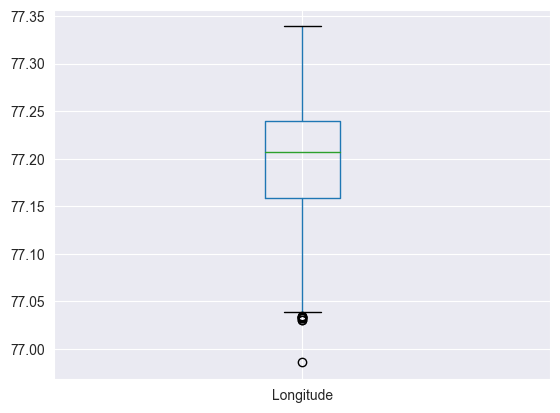

In [22]:
boxplot = res_data.boxplot(column=['Longitude'])

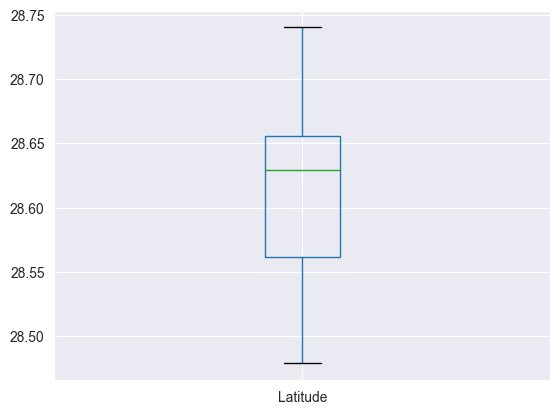

In [23]:
boxplot = res_data.boxplot(column=['Latitude'])

In [24]:
res_data = res_data.loc[res_data['Longitude'] > 77.00] 
#res_data.info()
res_data=res_data.drop(columns=['Restaurant ID','Country Code','Country','Rating color'])
res_data.head()

,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,fusion_num
2561,Burger.in,New Delhi,"84, Near Honda Showroom, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.196923,28.535382,Fast Food,350,Indian Rupees(Rs.),No,Yes,No,No,1,3.2,Average,46,1
2562,Days of the Raj,New Delhi,"81/3, 1st Floor, Qutub Residency, Adchini, New...",Adchini,"Adchini, New Delhi",77.197475,28.535493,"North Indian, Seafood, Continental",1500,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.4,Average,45,3
2563,Dilli Ka Dhaba,New Delhi,"66 A, Ground Floor, Sri Aurobindo Marg, Adchin...",Adchini,"Adchini, New Delhi",77.198033,28.537547,"South Indian, North Indian",500,Indian Rupees(Rs.),No,No,No,No,2,2.6,Average,11,2
2564,Govardhan,New Delhi,"84, Adjacent Hero Motor Bike Showroom, Main Me...",Adchini,"Adchini, New Delhi",77.196924,28.535523,"South Indian, North Indian, Chinese",500,Indian Rupees(Rs.),No,Yes,No,No,2,3.4,Average,238,3
2565,Mezbaan Grills,New Delhi,"A- 96, Shri Aurbindo Marg, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198122,28.538134,Mughlai,400,Indian Rupees(Rs.),No,No,No,No,1,3.1,Average,8,1


In [25]:
print(res_data['Locality'].value_counts())
print(res_data.Locality.unique())

Connaught Place                   119
Rajouri Garden                     97
Malviya Nagar                      84
Rajinder Nagar                     78
Defence Colony                     78
                                 ... 
Lemon Tree Premier, Aerocity        1
Hotel Regent Grand, Karol Bagh      1
Chhatarpur                          1
Sector 15, Dwarka                   1
JW Marriott New Delhi               1
Name: Locality, Length: 239, dtype: int64
['Adchini' 'Aditya Mega Mall, Karkardooma' 'Aerocity'
 'Aggarwal City Mall, Pitampura' 'Aggarwal City Plaza, Rohini' 'Alaknanda'
 'Ambience Mall, Vasant Kunj' 'Anand Lok' 'Anand Vihar'
 'Andaz Delhi, Aerocity' 'Ansal Plaza Mall, Khel Gaon Marg'
 'ARSS Mall, Paschim Vihar' 'Asaf Ali Road' 'Ashok Vihar Phase 1'
 'Ashok Vihar Phase 2' 'Ashok Vihar Phase 3' 'Barakhamba Road'
 'Basant Lok Market, Vasant Vihar' 'Bellagio, Ashok Vihar Phase 2'
 'Best Western Taurus Hotel, Mahipalpur' 'Bhikaji Cama Place'
 'Chanakyapuri' 'Chander Nagar' 'Chan

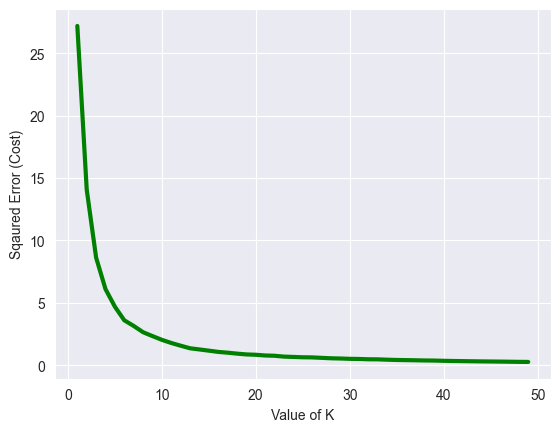

In [26]:
cost =[]
for i in range(1, 50):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(res_data[['Longitude', 'Latitude']])
      
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)     
  
# plot the cost against K values
plt.plot(range(1, 50), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.show() 
  

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0).fit(res_data[['Longitude', 'Latitude']])
res_data['pos'] = kmeans.labels_
cluster0=pd.DataFrame(res_data.loc[res_data['pos'] == 0])
unique_area0=list(cluster0.Locality.unique())
cluster1=pd.DataFrame(res_data.loc[res_data['pos'] == 1])
unique_area1=list(cluster1.Locality.unique())
cluster2=pd.DataFrame(res_data.loc[res_data['pos'] == 2])
unique_area2=list(cluster2.Locality.unique())
cluster3=pd.DataFrame(res_data.loc[res_data['pos'] == 3])
unique_area3=list(cluster3.Locality.unique())
cluster4=pd.DataFrame(res_data.loc[res_data['pos'] == 4])
unique_area4=list(cluster4.Locality.unique())
cluster5=pd.DataFrame(res_data.loc[res_data['pos'] == 5])
unique_area5=list(cluster5.Locality.unique())
cluster6=pd.DataFrame(res_data.loc[res_data['pos'] == 6])
unique_area6=list(cluster6.Locality.unique())

print(unique_area0,  unique_area1, unique_area2, unique_area3, unique_area4, unique_area5, unique_area6)


['Asaf Ali Road', 'Barakhamba Road', 'Chanakyapuri', 'Chandni Chowk', 'Chawri Bazar', 'Civil Lines', 'Connaught Place', 'Daryaganj', 'Dr. Zakir Hussain Marg', 'East Patel Nagar', 'Feroze Shah Road', 'Hotel Broadway, Daryaganj', 'Hotel Regent Grand, Karol Bagh', 'Hotel The Royal Plaza, Janpath', 'India Gate', 'ITO', 'Jama Masjid', 'Janpath', 'Jaypee Siddharth, Rajendra Place', 'Kamla Nagar', 'Karol Bagh', 'Kashmiri Gate', 'Khan Market', 'Le Meridien, Janpath', 'Maidens Hotel, Civil Lines', 'Mandi House', 'MGM Club, Daryaganj', 'Paharganj', 'Pandara Road Market', 'Pragati Maidan', 'Race Course', 'Rajendra Place', 'Rajinder Nagar', 'Sector 15, Dwarka', "Shangri La's - Eros hotel, Janpath", 'Sunder Nagar', 'Taj Vivanta, Khan Market', 'The Ashok, Chanakyapuri', 'The Claridges, Aurangzeb Road', 'The Imperial, Janpath', 'The Lalit New Delhi, Barakhamba Road', 'The Park, Connaught Place', 'The Taj Mahal Hotel, Mansingh Road', 'Vivek Vihar', 'West Patel Nagar'] ['Aditya Mega Mall, Karkardooma',

C:\Users\Bikash\AppData\Local\Temp\ipykernel_28544\2971767793.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pop_local = res_data.groupby('pos')['Longitude', 'Latitude', 'Aggregate rating'].agg({'Longitude':np.mean, 'Latitude':np.mean, 'Aggregate rating':np.median}).reset_index()


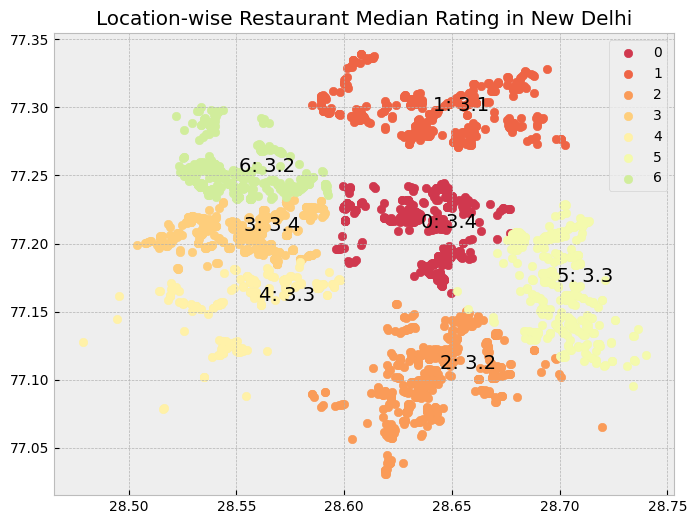

In [28]:
pop_local = res_data.groupby('pos')['Longitude', 'Latitude', 'Aggregate rating'].agg({'Longitude':np.mean, 'Latitude':np.mean, 'Aggregate rating':np.median}).reset_index()

pos_to_area_name = {
                        0: "A",
                        1: "B",
                        2: "C",
                        3: "D",
                        4: "E",
                        5: "F",
                        6: "G",
 
                    }
res_data['area_name'] = res_data['pos'].apply(lambda x: pos_to_area_name[x])
with plt.style.context('bmh', after_reset=True):
    pal = sns.color_palette('Spectral', 10)
    plt.figure(figsize = (8,6))
    for i in range(7):
        ix = res_data.pos == i
        plt.scatter(res_data.loc[ix, 'Latitude'], res_data.loc[ix, 'Longitude'], color = pal[i], label = str(i))
        plt.text(pop_local.loc[i, 'Latitude'], pop_local.loc[i, 'Longitude'], str(i) + ': '+str(pop_local.loc[i, 'Aggregate rating'].round(2)), fontsize = 14, color = 'black')
    plt.title('Location-wise Restaurant Median Rating in New Delhi')
    plt.legend()
    plt.show()

In [29]:
lname=str(input("Enter your locality name: "))



In [30]:
for i in unique_area0:
    if (lname == i):
        c="A"
for i in unique_area1:
    if (lname == i):
        c="B"
for i in unique_area2:
    if (lname == i):
        c="C"
for i in unique_area3:
    if (lname == i):
        c="D"
for i in unique_area4:
    if (lname == i):
        c="E"
for i in unique_area5:
    if (lname == i):
        c="F"
for i in unique_area6:
    if (lname == i):
        c="G"
print(c)
res_data[res_data.area_name.str.contains(c, case=False)].sort_values(by='Aggregate rating', ascending=False).head(5)

D


,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes,fusion_num,pos,area_name
7067,Pa Pa Ya,New Delhi,"Dome, Level 4, Select Citywalk, A-3, District ...","Select Citywalk Mall, Saket","Select Citywalk Mall, Saket, New Delhi",77.218698,28.528456,"Asian, Chinese, Thai, Japanese",2000,Indian Rupees(Rs.),...,No,No,No,4,4.7,Excellent,268,4,3,D
7180,Greenr Cafe,New Delhi,"416, Gora Street, Behind Dada Jungi House, Sha...",Shahpur Jat,"Shahpur Jat, New Delhi",77.213256,28.548542,Cafe,1100,Indian Rupees(Rs.),...,Yes,No,No,3,4.6,Excellent,112,1,3,D
3981,Coast Cafe,New Delhi,"H-2, 2nd & 3rd Floor, Hauz Khas Village, New D...",Hauz Khas Village,"Hauz Khas Village, New Delhi",77.196028,28.554511,"Continental, Kerala",1400,Indian Rupees(Rs.),...,Yes,No,No,3,4.5,Excellent,1033,2,3,D
3944,Natural Ice Cream,New Delhi,"G-1, Ground Floor, Opposite Aurobindo Market, ...",Hauz Khas,"Hauz Khas, New Delhi",77.204566,28.551338,Ice Cream,150,Indian Rupees(Rs.),...,Yes,No,No,1,4.5,Excellent,67,1,3,D
5199,Dilli BC,New Delhi,"B-2, Local Shopping Complex, STC/MMTC Market, ...",Malviya Nagar,"Malviya Nagar, New Delhi",77.203612,28.532581,"North Indian, Mughlai",700,Indian Rupees(Rs.),...,Yes,No,No,2,4.4,Very Good,84,2,3,D
